La segmentación de imágenes consiste en dividir una imagen en varios segmentos.

En la _segmentación semántica_, todos los píxeles que forman parte del mismo tipo de objeto se asignan al mismo segmento. Por ejemplo, en el sistema de visión de un vehículo autónomo, todos los píxeles que forman parte de la imagen de un peatón podrían asignarse al segmento "peatón" (habría un segmento que contendría a todos los peatones).

En la _segmentación por instancias_, todos los píxeles que forman parte del mismo objeto individual se asignan al mismo segmento. En este caso, habría un segmento diferente para cada peatón.

El estado del arte en segmentación semántica o por instancias se logra mediante arquitecturas complejas basadas en redes neuronales convolucionales . Aquí vamos a hacer algo mucho más sencillo: _segmentación por colores_. Simplemente asignaremos los píxeles al mismo segmento si tienen un color similar.

En algunas aplicaciones, esto puede ser suficiente. Por ejemplo, si se desea analizar imágenes satelitales para medir cuánta superficie forestal total hay en una región, la segmentación por colores puede ser suficiente.

In [55]:
import numpy as np
import PIL #Python Imaging Library
from PIL import Image

image = np.asarray(Image.open('./images/ladybug.png'))
image.shape

(533, 800, 3)

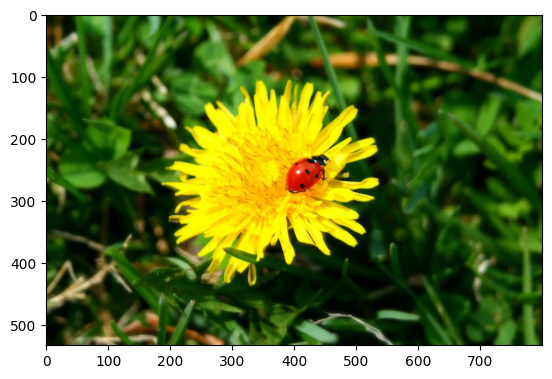

In [56]:
import matplotlib.pyplot as plt

_ = plt.imshow(image)

In [57]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

Utilice el algoritmo de kmeans para segmentar la imagen en distintos colores, pruebe con distintos valores de k. Segmentar la imagen implica reemplazar cada instancia (cada pixel de la imagen) por el centroide asignado por el algoritmo. Use los atributos `cluster_centers_` y `labels_`.

Después de aplicar el algoritmo y segmentar la imagen, grafique la imagen segmentada representada mediante los centroides encontrados. No olvide redimensonar y escalar los datos antes de graficar.¿Qué valor de k considera adecuado para discriminar todos los colores en la imagen?  

Grafique algunas capas de colores por separado. Puede utilizar la siguiente herramienta online: https://www.rapidtables.com/convert/color/rgb-to-hex.html

In [76]:
from sklearn.cluster import KMeans

In [77]:
k = 10
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=10, n_init=10, random_state=1)

In [118]:
kmeans.cluster_centers_

array([[251.02441312, 240.30693188,   6.67293631],
       [ 39.68088532,  81.80704033,   7.82461409],
       [ 89.66484338, 142.68804784,  45.5546307 ],
       [  4.2839469 ,  23.81824343,   1.30863653],
       [231.3937813 , 189.89190317,   7.71082012],
       [160.66466298, 167.41901098, 108.60615533],
       [137.998805  , 126.04379305,  42.49275974],
       [205.2261958 ,  41.12427358,  10.10102816],
       [ 66.46182805, 108.03460796,  20.1623765 ],
       [ 17.22066938,  53.64831634,   2.83479031]])

In [79]:
kmeans.labels_

array([3, 3, 3, ..., 9, 9, 9])

In [95]:
x =kmeans.cluster_centers_[kmeans.labels_]
x

array([[ 4.2839469 , 23.81824343,  1.30863653],
       [ 4.2839469 , 23.81824343,  1.30863653],
       [ 4.2839469 , 23.81824343,  1.30863653],
       ...,
       [17.22066938, 53.64831634,  2.83479031],
       [17.22066938, 53.64831634,  2.83479031],
       [17.22066938, 53.64831634,  2.83479031]])

In [81]:
x = x/255

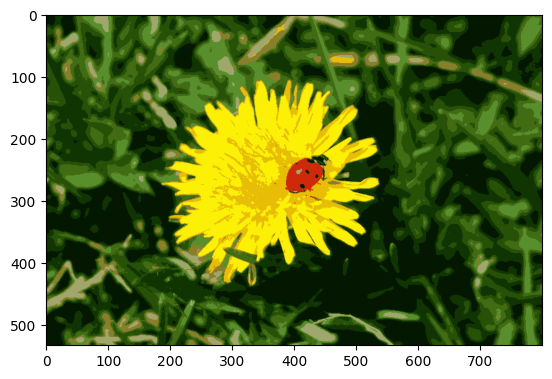

In [82]:
_ = plt.imshow(x.reshape(image.shape))

In [113]:
aux = kmeans.cluster_centers_[7]
aux

array([205.2261958 ,  41.12427358,  10.10102816])

In [114]:
x2 =kmeans.cluster_centers_[kmeans.labels_]
x2


array([[ 4.2839469 , 23.81824343,  1.30863653],
       [ 4.2839469 , 23.81824343,  1.30863653],
       [ 4.2839469 , 23.81824343,  1.30863653],
       ...,
       [17.22066938, 53.64831634,  2.83479031],
       [17.22066938, 53.64831634,  2.83479031],
       [17.22066938, 53.64831634,  2.83479031]])

In [115]:

x2[x2 != aux] = 0
x2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [116]:
x2 = x2/255

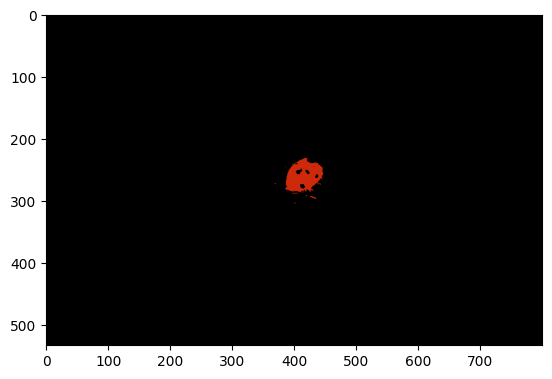

In [117]:
_ = plt.imshow(x2.reshape(image.shape))